# E-Commerce Business Insights and Recommendations
The goal of this project is to gain an understanding of a business by exploring its dataset, identify business questions to answer, and uncover actionable insights using SQL and Python. The insights gathered will be used to develop dashboards and visualisations in PowerBI that can help the business make informed decisions and create value.

## Dataset
For this project, I will be using the Fictitious E-Commerce Dataset ["thelook_ecommerce"](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=thelook_ecommerce&page=dataset&project=fiery-nimbus-360723) from Google BigQuery. This dataset contains detailed information about:
* `distribution_centers`,
* `events`,
* `inventory_items`,
* `order_items`,
* `orders`,
* `products`,
* `users`

The dataset has been collected from a large online retailer and represents a real-life scenario for a retail business. With a large number of tables and a large volume of data, this dataset provides a good representation of a typical retail business and offers a great opportunity to apply a variety of data analysis techniques to uncover insights.

## Tasks
1. **Data Exploration:**
* Familiarise with the e-commerce dataset, including tables and columns.
* Identify business questions that can be answered to uncover actionable insights and create value for the business.

2. **Data Cleaning and Transformation:**
* Identify and extract relevant tables to analyse for business recommendations.
* Check for missing values, duplicates.

3. **Data Analysis and Visualisation:**
* Visualise the distributions and summary statistics
* Remove any outliers
* Calculate key performance indicators (KPIs) that measure the success of the business.

4. **Statistical Analysis:**
* Conduct hypothesis tests to determine if there are significant differences between groups.
* Identify major drivers of the e-commerce KPIs.

5. **KMeans Clustering:**
* Use the KMeans machine learning technique to segment customers into different groups and understand their behavior and preferences.

6. **Provide recommendations:**
* Provide recommendations based on the results from the data analysis, hypothesis testing, KPI calculation, and KMeans clustering.
* Use Power BI to create a dashboard to display the results of your analysis.

## Packages

In [11]:
# Data processing
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
sns.set_style("white", {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False})
sns.set_palette(['#0068ff'])

# BigQuery API
from google.cloud import bigquery 
import pandas_gbq
import os

# Statistics
from scipy import stats

# Create BigQuery client
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'bq_service.json'
client = bigquery.Client()

# Data Exploration
I need to have an overview of the tables in the dataset to gain an understanding of the business, which can allow me to plan on how to create value for the business by uncovering new opportunities and areas for improvement.

### Schema

In [2]:
q = """
select 
    table_name, 
    column_name,
    data_type
from bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS
"""

schema_df = pd.read_gbq(q)
schema_df

,table_name,column_name,data_type
0,users,id,INT64
1,users,first_name,STRING
2,users,last_name,STRING
3,users,email,STRING
4,users,age,INT64
...,...,...,...
68,events,postal_code,STRING
69,events,browser,STRING
70,events,traffic_source,STRING
71,events,uri,STRING


In [3]:
# View total number of rows
q = """
SELECT 
    table_id,
    row_count
FROM bigquery-public-data.thelook_ecommerce.__TABLES__
"""

pd.read_gbq(q)

,table_id,row_count
0,distribution_centers,10
1,events,2428570
2,inventory_items,489577
3,order_items,181407
4,orders,124915
5,products,29120
6,users,100000


In [4]:
# Preview and understand each table
q = """
select *
from bigquery-public-data.thelook_ecommerce.users
limit 5;
"""
pd.read_gbq(q)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,4002,Melanie,Boone,melanieboone@example.net,66,F,Acre,49958 Peter Springs,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-09-08 05:37:00+00:00
1,8749,Jessica,Osborne,jessicaosborne@example.net,33,F,Acre,177 Adrian Passage Apt. 352,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Organic,2019-05-29 00:17:00+00:00
2,11262,Thomas,Clark,thomasclark@example.com,28,M,Acre,805 Reynolds Station Apt. 321,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-12-18 17:20:00+00:00
3,15588,Kara,Robinson,kararobinson@example.com,45,F,Acre,90331 Kirsten Forest Suite 485,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Organic,2020-05-21 03:05:00+00:00
4,29096,Brandon,Sullivan,brandonsullivan@example.org,24,M,Acre,190 Gregory Heights Apt. 100,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2021-07-07 14:19:00+00:00


## Sales and profit margin

In [5]:
q = """
select
    extract(year from o.created_at) as year,
    extract(quarter from o.created_at) as quarter,
    sum(num_of_item * cost) as costs,
    sum(num_of_item * retail_price) as sales,
    sum(num_of_item * (retail_price - cost)) as profit,
    sum(num_of_item * (retail_price - cost)) / sum(num_of_item * retail_price) as profit_margin

from bigquery-public-data.thelook_ecommerce.orders as o
join bigquery-public-data.thelook_ecommerce.order_items as oi
on o.order_id = oi.order_id
join bigquery-public-data.thelook_ecommerce.products as p
on p.id = oi.product_id

group by year, quarter
order by year, quarter
"""

df = pd.read_gbq(q)
df.head()

,year,quarter,costs,sales,profit,profit_margin
0,2019,1,17410.095788,36557.110039,19147.014251,0.523756
1,2019,2,57287.633624,118960.350208,61672.716585,0.518431
2,2019,3,99768.000047,207767.700035,107999.699989,0.519810
3,2019,4,147820.966974,306646.000179,158825.033204,0.517943
4,2020,1,184544.942476,384641.560183,200096.617707,0.520216


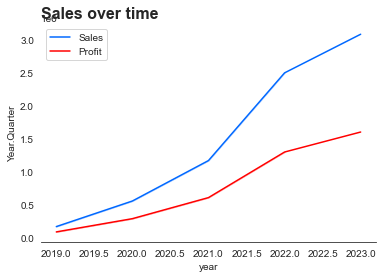

In [7]:
plt.title('Sales over time', loc='left')
sns.lineplot(x=df.year, y=df.sales, label='Sales', ci=False)
sns.lineplot(x=df.year, y=df.profit, color='red', label='Profit', ci=False)
plt.ylabel('Sales')
plt.ylabel('Year.Quarter')
plt.legend();

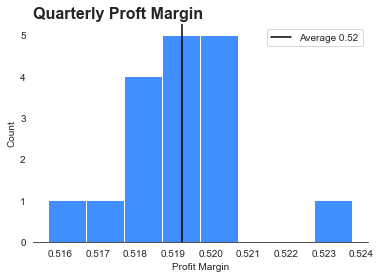

In [8]:
plt.title('Quarterly Proft Margin', loc='left')
sns.histplot(df.profit_margin)
plt.xlabel('Profit Margin')
plt.axvline(df.profit_margin.mean(), color='k', label='Average {:.2f}'.format(df.profit_margin.mean()))
plt.legend();

## Total profit per customer

In [15]:
q = """
select
    o.user_id,
    count(distinct o.order_id) as num_orders,
    sum(num_of_item * sale_price) as sales,
    sum(num_of_item * (sale_price - cost)) as profit,
    sum(num_of_item * (sale_price - cost)) / count(distinct o.order_id) as avg_profit_per_order

from 
    bigquery-public-data.thelook_ecommerce.order_items  as o
join 
    bigquery-public-data.thelook_ecommerce.orders as ord
on
    o.order_id = ord.order_id
join bigquery-public-data.thelook_ecommerce.products as p
on
    o.product_id = p.id
group by 
    user_id

order by profit desc
"""

df1 = pd.read_gbq(q)
df1.head(10)

,user_id,num_orders,sales,profit,avg_profit_per_order
0,39736,1,5391.599960,2869.837298,2869.837298
1,20472,4,5308.969971,2838.783563,709.695891
2,51050,2,5427.320015,2800.545452,1400.272726
3,50371,1,4655.880005,2737.298437,2737.298437
4,4451,2,4668.699993,2709.351587,1354.675793
5,55918,2,4735.960003,2707.265835,1353.632918
6,70010,1,4691.919998,2706.922393,2706.922393
7,84617,2,5044.399994,2672.060602,1336.030301
8,19109,3,5113.119999,2666.127188,888.709063
9,24415,2,4579.919991,2603.248828,1301.624414


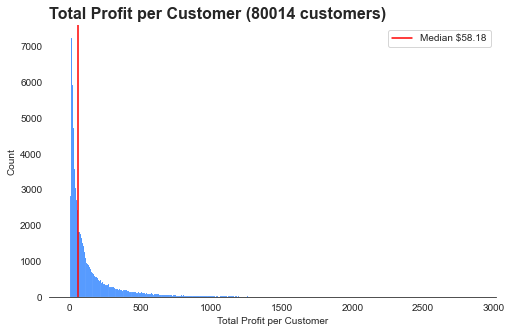

In [18]:
plt.title('Total Profit per Customer ({} customers)'.format(len(df1)), loc='left')

sns.histplot(x=df1.profit)
plt.xlabel('Total Profit per Customer')
plt.axvline(df1.profit.median(), color='r', label='Median ${:.2f}'.format(df1.profit.median()))
plt.legend();

## Frequency and Value of subsequent orders

In [225]:
q = """
with customer_orders as (
  select 
    user_id, 
    date(created_at) as date, 
    order_id, 
    row_number() over (partition by user_id order by created_at) as order_number, 
    num_of_item
  from 
    `bigquery-public-data.thelook_ecommerce.orders`
  
), 
order_intervals as (
  select 
    *, 
    ifnull(date_diff(date, lag(date) over (partition by user_id order by date), day), null) as days_from_last_order
  from customer_orders
),
order_profit as (
  select 
    o.order_id, 
    oi.num_of_item, 
    retail_price, 
    cost, 
    (retail_price - cost) * num_of_item as profit, 
    brand, 
    name, 
    category
  from order_intervals as oi 
  join `bigquery-public-data.thelook_ecommerce.order_items` as o 
    on oi.order_id = o.order_id 
  join `bigquery-public-data.thelook_ecommerce.products` as p 
    on o.product_id = p.id
)
select 
  int.user_id, 
  age,
  date, 
  p.order_id, 
  order_number, 
  days_from_last_order, 
  int.num_of_item, 
  round(retail_price, 2) as price, 
  round(cost, 2) as cost, 
  round(profit, 2) as profit, 
  brand, 
  category
from order_intervals as int 
join order_profit as p 
on int.order_id = p.order_id 
join bigquery-public-data.thelook_ecommerce.users
on users.id = int.user_id
order by user_id, order_number
"""

rfm = pd.read_gbq(q)
rfm.groupby('order_number')[['profit', 'days_from_last_order']].agg({
    'profit': ['sum', 'mean', 'median', 'std'],
    'days_from_last_order': ['mean', 'median', 'std']})


profit                              days_from_last_order  \
                     sum       mean median        std                 mean   
order_number                                                                 
1             6788798.60  58.411834  33.02  83.414994                 <NA>   
2             2532953.22  58.718808  33.13  85.834587           216.409277   
3              837111.40  57.979734  33.03  82.629322           165.179041   
4              426962.61  58.288411  32.81  84.204269           142.985256   

                                 
             median         std  
order_number                     
1              <NA>         NaN  
2             135.0  232.251781  
3              99.0  183.489445  
4              87.0  164.173902

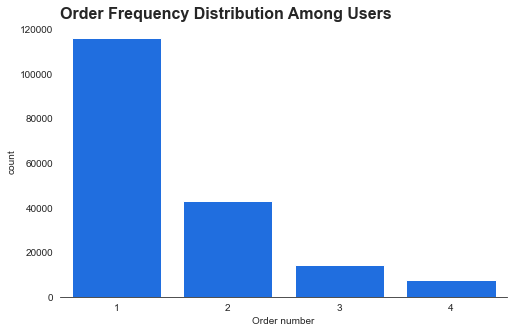

In [217]:
sns.countplot(x='order_number', data=rfm, color='#0068ff')
plt.title('Order Frequency Distribution Among Users', loc='left')
plt.xlabel('Order number');

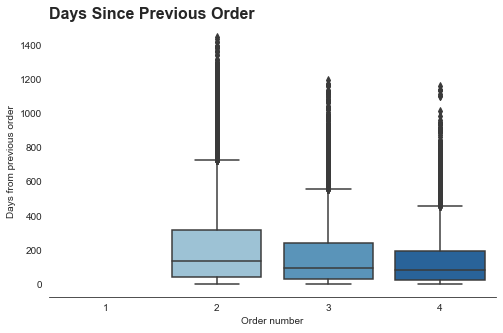

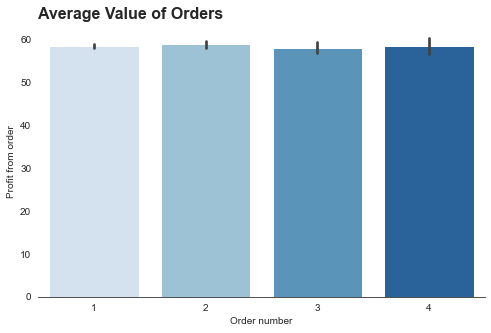

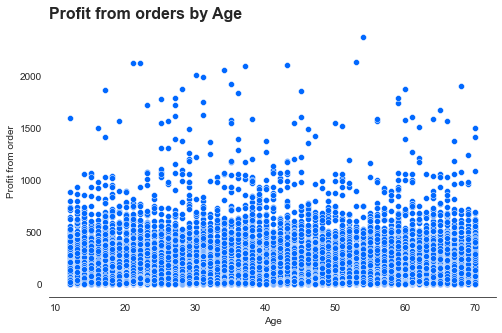

In [226]:
plt.title('Days Since Previous Order', loc='left')
sns.boxplot(data=rfm, x='order_number', y='days_from_last_order', palette='Blues')
plt.xlabel('Order number')
plt.ylabel('Days from previous order')
plt.show()


plt.title('Average Value of Orders', loc='left')
sns.barplot(data=rfm, x='order_number', y='profit', palette='Blues')
plt.xlabel('Order number')
plt.ylabel('Profit from order')
plt.show();

plt.title('Profit from orders by Age', loc='left')
sns.scatterplot(data=rfm, x='age', y='profit', palette='Blues')
plt.xlabel('Age')
plt.ylabel('Profit from order')
plt.show();

## Order return rate

In [51]:
q = """
select
    extract(year from created_at) as year,
    extract(month from created_at) as month,
    count(distinct order_id) as total_orders,
    sum(if(status='Returned', 1, 0)) as total_returned,
    sum(if(status='Returned', 1, 0)) / count(created_at) as return_rate
    
from bigquery-public-data.thelook_ecommerce.orders as o
group by year, month
order by year, month
"""

df2 = pd.read_gbq(q)
df2.head()

,year,month,total_orders,total_returned,return_rate
0,2019,1,29,2,0.068966
1,2019,2,59,8,0.135593
2,2019,3,129,10,0.077519
3,2019,4,168,20,0.119048
4,2019,5,229,25,0.109170


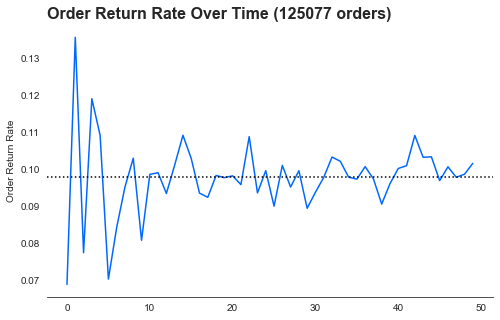

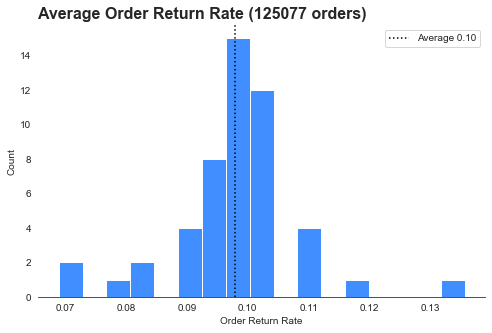

In [52]:
plt.title('Order Return Rate Over Time ({} orders)'.format(df2.total_orders.sum()), loc='left')
sns.lineplot(x=df2.index, y=df2.return_rate)
plt.axhline(df2.return_rate.mean(), color='k', ls=':',label='Average {:.2f}'.format(df2.return_rate.mean()))
plt.ylabel('Order Return Rate')
plt.show()

plt.title('Average Order Return Rate ({} orders)'.format(df2.total_orders.sum()), loc='left')
sns.histplot(df2.return_rate)
plt.xlabel('Order Return Rate')
plt.axvline(df2.return_rate.mean(), color='k', ls=':',label='Average {:.2f}'.format(df2.return_rate.mean()))
plt.legend()
plt.show()


## Revenue streams

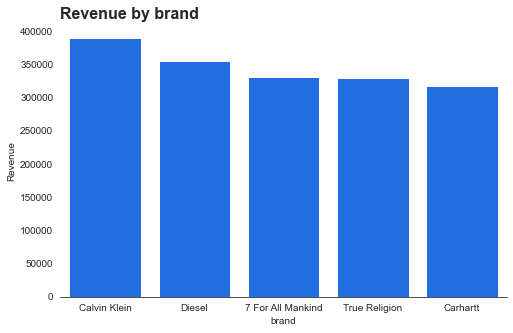

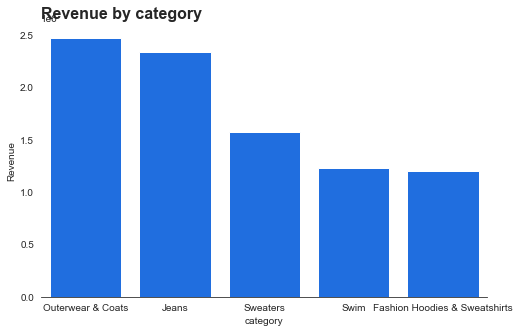

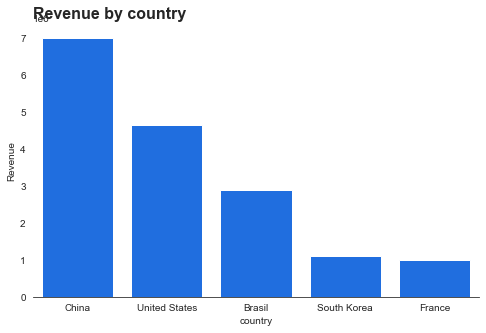

In [53]:
# Revenue Streams
rev_streams = ['brand', 'category', 'country']

for stream in rev_streams:
    q = """
    select
        {},
        sum(sale_price * num_of_item) as total_revenue

    from bigquery-public-data.thelook_ecommerce.order_items as oi
    join bigquery-public-data.thelook_ecommerce.products as p
    on oi.product_id = p.id
    join bigquery-public-data.thelook_ecommerce.orders as o
    on o.order_id = oi.order_id
    join bigquery-public-data.thelook_ecommerce.users as u
    on oi.user_id = u.id

    group by {}

    order by total_revenue desc
    limit 5
    """.format(stream, stream)

    df = pd.read_gbq(q)

    sns.barplot(x=stream, y='total_revenue', data=df, color='#0068ff')
    plt.title('Revenue by {}'.format(stream), loc='left')
    plt.xlabel(stream)
    plt.ylabel('Revenue')
    plt.show()

## Customer demographics

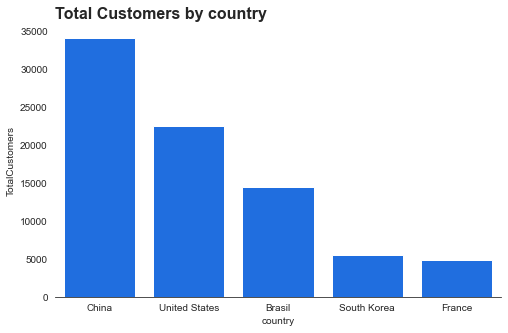

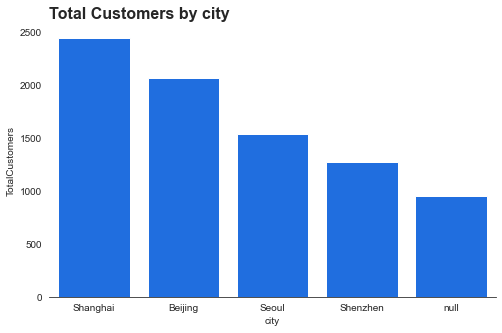

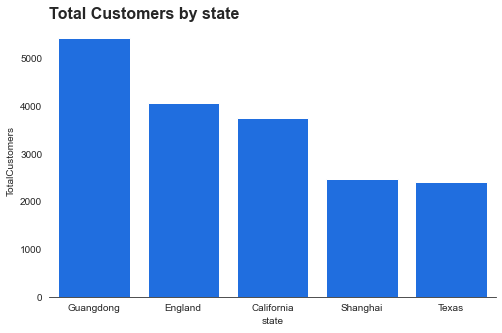

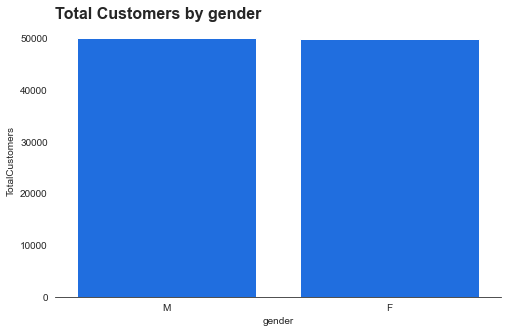

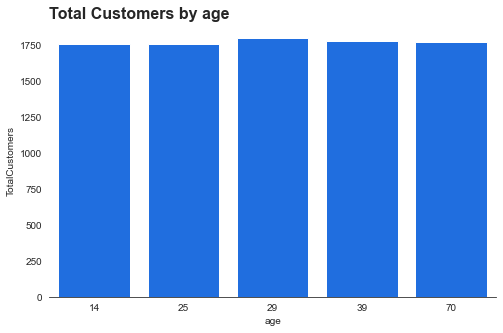

In [54]:
customer_base = ['country', 'city', 'state', 'gender', 'age']

for i in customer_base:
    q = """
    select 
        {},
        count(*) as num_customers
    from bigquery-public-data.thelook_ecommerce.users
    group by {}

    order by num_customers desc
    limit 5
    """.format(i,i)

    df = pd.read_gbq(q)
    sns.barplot(x=i, y='num_customers', data=df, color='#0068ff')
    plt.title('Total Customers by {}'.format(i), loc='left')
    plt.xlabel(i)
    plt.ylabel('TotalCustomers')
    plt.show()


## Products price relative to its average category and brand price

In [147]:
q = """
select 
    name,
    brand,
    category,
    retail_price,
    cost,
    sum(num_of_item) as total_sold,
    case
        when sum(num_of_item) >= 0 and sum(num_of_item) <= 10 then '0-10'
        when sum(num_of_item) > 10 and sum(num_of_item) <= 20 then '10-20'
        when sum(num_of_item) > 20 and sum(num_of_item) <= 30 then '20-30'
        when sum(num_of_item) > 30 and sum(num_of_item) <= 40 then '30-40'
        else '40+'
    end as bins,
    avg(retail_price) over (partition by brand, category) as avg_price_by_brand_category,
    (retail_price / avg(retail_price) over (partition by brand, category)) as relative_price

from bigquery-public-data.thelook_ecommerce.order_items as o
join bigquery-public-data.thelook_ecommerce.orders as ord
on o.order_id = ord.order_id
join bigquery-public-data.thelook_ecommerce.products as p
on p.id = o.product_id

group by name, brand, category, retail_price, cost
order by bins
"""

df = pd.read_gbq(q)
df.head()

,name,brand,category,retail_price,cost,total_sold,bins,avg_price_by_brand_category,relative_price
0,10 Deep - Mens Infield Hoody Hoodie In Black,10 Deep,Fashion Hoodies & Sweatshirts,103.949997,53.638198,10,0-10,103.949997,1.000000
1,Men's Single Breasted Two Button Navy Stripe 3...,Abini,Suits & Sport Coats,89.949997,34.001099,10,0-10,83.521426,1.076969
2,Men's Single Breasted 3 Button Gray Extra Fine...,Abini,Suits & Sport Coats,79.949997,32.939399,8,0-10,83.521426,0.957239
3,Men's Single Breasted Two Button White Tuxedo,Abini,Suits & Sport Coats,79.949997,28.702049,8,0-10,83.521426,0.957239
4,Men's Single Breasted 3 Button Wool Blend Gray...,Abini,Suits & Sport Coats,79.949997,28.861949,6,0-10,83.521426,0.957239


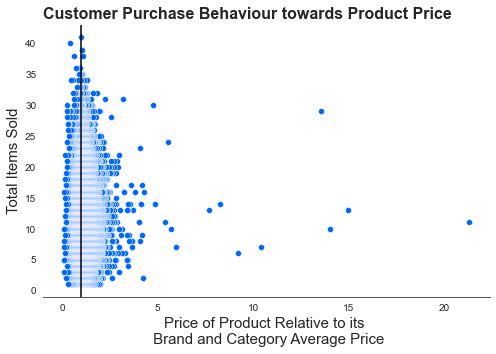

In [140]:
plt.title('Customer Purchase Behaviour towards Product Price', loc='left')
sns.scatterplot(y=df.total_sold, x=df.relative_price)
plt.xlabel('Price of Product Relative to its \n Brand and Category Average Price', fontsize=15)
plt.axvline(1, color='k')
plt.ylabel('Total Items Sold', fontsize=15);

## Profit by traffic source


In [72]:
q = """
select 
    traffic_source,
    sum(num_of_item) as items_sold,
    count(distinct o.user_id) as users,
    sum(((retail_price-cost) * num_of_item)/1000000) as profit_mils

from bigquery-public-data.thelook_ecommerce.orders as o
join bigquery-public-data.thelook_ecommerce.users as u
on o.user_id = u.id
join bigquery-public-data.thelook_ecommerce.order_items as oi
on oi.user_id = u.id
join bigquery-public-data.thelook_ecommerce.products as p
on p.id = oi.product_id

group by traffic_source
order by profit_mils
"""

df = pd.read_gbq(q)
df.head()


,traffic_source,items_sold,users,profit_mils
0,Display,24823,3208,0.766339
1,Email,31387,4009,0.979383
2,Facebook,38921,4879,1.205533
3,Organic,91817,11842,2.834874
4,Search,431673,56047,13.286341


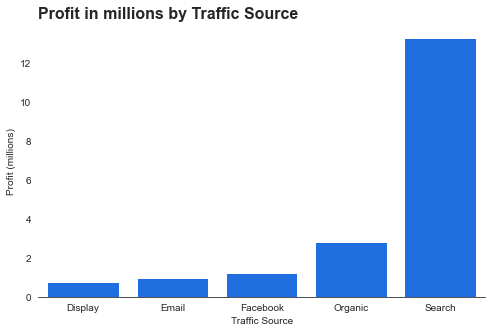

In [73]:
sns.barplot(x=df.traffic_source, y=df.profit_mils, color='#0068ff')
plt.title('Profit in millions by Traffic Source', loc='left')
plt.ylabel('Profit (millions)')
plt.xlabel('Traffic Source');

## Profit margin by email domain

In [74]:
q = """
select 
    substr(email, instr(email, '.')+1) as email_domain,
    sum(num_of_item) as items_sold

from bigquery-public-data.thelook_ecommerce.orders as o
join bigquery-public-data.thelook_ecommerce.users as u
on o.user_id = u.id
join bigquery-public-data.thelook_ecommerce.order_items as oi
on oi.user_id = u.id
join bigquery-public-data.thelook_ecommerce.products as p
on p.id = oi.product_id

group by email_domain
"""
pd.read_gbq(q)

,email_domain,items_sold
0,net,207566
1,com,205941
2,org,205114


## Top 5 profit contributor brands each year

In [97]:
q = """
with brand_profits as (
    select
        extract(year from o.created_at) as year,
        brand,
        sum((retail_price - cost) * num_of_item) as profit
    from 
        bigquery-public-data.thelook_ecommerce.orders as o
    join 
        bigquery-public-data.thelook_ecommerce.order_items as oi
    on 
        o.order_id = oi.id
    join 
        bigquery-public-data.thelook_ecommerce.products as p
    on 
        oi.product_id = p.id
    group by
        year, 
        brand
),

pct_profit as (
    select 
        *,
        sum(profit) over(partition by year) as annual_profit,
        (profit / sum(profit) over(partition by year))*100 as pct_total_profit
    from
        brand_profits
    order by 
        year, 
        pct_total_profit desc
)

select
    *,
    rank() over (partition by year order by pct_total_profit desc) as rank
from
    pct_profit
order by 
    year,
    rank;
"""

pct_profit = pd.read_gbq(q)
top_5 = pct_profit[pct_profit['rank'].isin([1,2,3,4,5])]
top_5

,year,brand,profit,annual_profit,pct_total_profit,rank
0,2019,Calvin Klein,3729.464152,1.782799e+05,2.091915,1
1,2019,Diesel,2724.310883,1.782799e+05,1.528109,2
2,2019,True Religion,2592.662144,1.782799e+05,1.454265,3
3,2019,The North Face,2544.353917,1.782799e+05,1.427168,4
4,2019,Oakley,2192.077309,1.782799e+05,1.229571,5
1138,2020,Diesel,10553.415710,6.059617e+05,1.741598,1
1139,2020,Carhartt,10400.402040,6.059617e+05,1.716347,2
1140,2020,True Religion,9596.641510,6.059617e+05,1.583704,3
1141,2020,7 For All Mankind,9305.845094,6.059617e+05,1.535715,4
1142,2020,Tommy Hilfiger,9151.579075,6.059617e+05,1.510257,5


## Current top 5 brand's profit performance over time

In [109]:
q = """
with brand_profits as (
    select
        extract(year from o.created_at) as year,
        brand,
        sum((retail_price - cost) * num_of_item) as profit
    from 
        bigquery-public-data.thelook_ecommerce.orders as o
    join 
        bigquery-public-data.thelook_ecommerce.order_items as oi
    on 
        o.order_id = oi.id
    join 
        bigquery-public-data.thelook_ecommerce.products as p
    on 
        oi.product_id = p.id

    group by
        year, 
        brand
), 

top_5 as (
    select
        brand,
        sum(profit) as total_profit
    from 
        brand_profits
    group by 
        brand
    order by 
        total_profit desc

    limit 5
)


select 
    year,
    top_5.brand,
    profit as year_profit,
    total_profit as all_time_profit
from
    brand_profits
join top_5
on top_5.brand = brand_profits.brand

order by 
    year desc, 
    total_profit desc
"""

top_profit = pd.read_gbq(q)
top_profit.drop('year_profit',axis=1).head(5)

,year,brand,all_time_profit
0,2023,Calvin Klein,106977.038598
1,2023,Diesel,94887.642805
2,2023,Carhartt,93102.834043
3,2023,7 For All Mankind,86236.616595
4,2023,True Religion,82937.251489


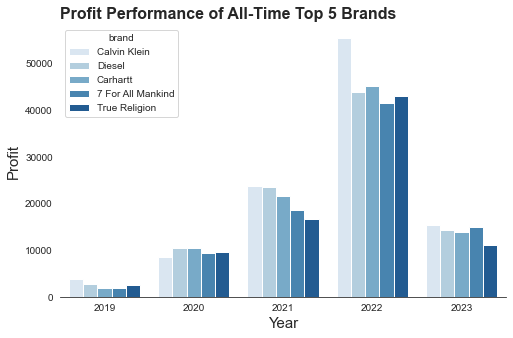

In [110]:
sns.barplot(x=top_profit.year, y=top_profit.year_profit, hue=top_profit.brand, palette='Blues');

plt.title('Profit Performance of All-Time Top 5 Brands', loc='left')
plt.ylabel('Profit', fontsize=15)
plt.xlabel('Year', fontsize=15);

## Order return rate by distribution center

In [79]:
q = """
with orders as (
    select 
        extract(year from delivered_at) as year,
        floor((extract(month from delivered_at) -1)/3)+1 as quarter,
        d.name as distribution_center,
        count(*) as total_orders,
        sum(case when status = 'Returned' then 1 else 0 end) as returned_orders,
        sum(case when status = 'Returned' then 1 else 0 end) / count(*) as order_return_rate
        
    from 
        bigquery-public-data.thelook_ecommerce.order_items as oi
    join
        bigquery-public-data.thelook_ecommerce.products as p
    on
        oi.product_id = p.id
    join
        bigquery-public-data.thelook_ecommerce.distribution_centers as d
    on
        d.id = p.distribution_center_id
    where 
        delivered_at is not null

    group by 
        year,
        quarter,
        distribution_center
        
    order by 
        year, 
        quarter
)

select 
    *,
from 
    orders
order by order_return_rate desc
"""
rr_df = pd.read_gbq(q)

rr_df['distribution_state'] = rr_df['distribution_center'].apply(lambda x: x.split()[-1])
rr_df.head()

,year,quarter,distribution_center,total_orders,returned_orders,order_return_rate,distribution_state
0,2019,1.0,Philadelphia PA,9,4,0.444444,PA
1,2019,1.0,Houston TX,16,7,0.437500,TX
2,2019,1.0,New Orleans LA,7,3,0.428571,LA
3,2019,2.0,Memphis TN,46,19,0.413043,TN
4,2019,1.0,Charleston SC,13,5,0.384615,SC


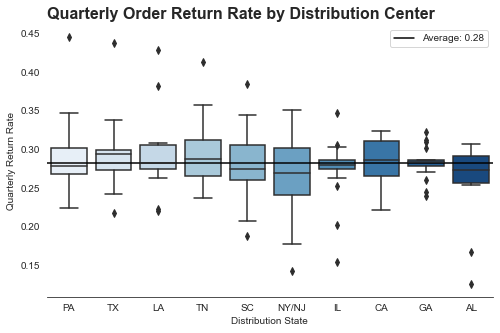

In [86]:
plt.title('Quarterly Order Return Rate by Distribution Center', loc='left')
sns.boxplot(data=rr_df, x='distribution_state', y='order_return_rate', palette='Blues')
plt.axhline(rr_df.order_return_rate.mean(), color='k', label='Average: {:.2f}'.format(rr_df.order_return_rate.mean()))
plt.legend()
plt.ylabel('Quarterly Return Rate')
plt.xlabel('Distribution State');

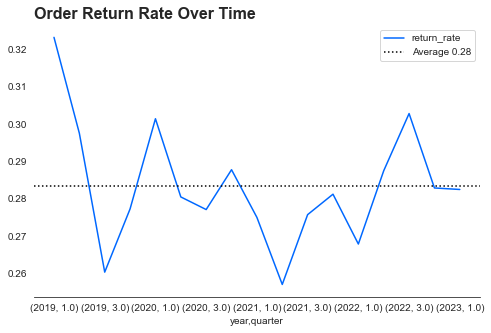

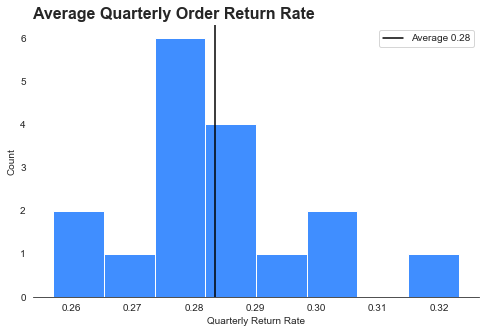

In [87]:
rr_over_time = rr_df.groupby(['year', 'quarter'])[['total_orders', 'returned_orders']].sum()
rr_over_time['return_rate'] = rr_over_time.returned_orders / rr_over_time.total_orders

plt.title('Order Return Rate Over Time', loc='left')
rr_over_time.return_rate.plot()
plt.axhline(rr_over_time.return_rate.mean(), color='k', ls=':', label='Average {:.2f}'.format(
    rr_over_time.return_rate.mean()))

plt.legend()
plt.show();

sns.histplot(rr_over_time.return_rate)
plt.title('Average Quarterly Order Return Rate', loc='left')
plt.axvline(rr_over_time.return_rate.mean(), color='k', label='Average {:.2f}'.format(rr_over_time.return_rate.mean()))
plt.xlabel('Quarterly Return Rate')
plt.legend()
plt.show();



## Inventory ratio

In [88]:
# Preview table
q = """
with cogs as (
    select
        extract(year from created_at) as year,
        extract(quarter from created_at) as quarter,
        product_distribution_center_id as distribution_id,
        sum(cost) as cost_of_goods_sold
    from 
        bigquery-public-data.thelook_ecommerce.inventory_items
    where
        sold_at is not null
    group by 
        year, quarter, product_distribution_center_id
),

coi as (
    select
        extract(year from created_at) as year,
        extract(quarter from created_at) as quarter,
        product_distribution_center_id,
        sum(cost) as cost_of_inventory
    from 
        bigquery-public-data.thelook_ecommerce.inventory_items
    group by 
        year, quarter, product_distribution_center_id
)

select 
    cogs.year, 
    cogs.quarter, 
    distribution_id, 
    cost_of_goods_sold, 
    cost_of_inventory,
    cost_of_goods_sold / cost_of_inventory as inventory_ratio
from 
    cogs
join
    coi
on
    cogs.year = coi.year 
    and cogs.quarter = coi.quarter 
    and cogs.distribution_id = coi.product_distribution_center_id

order by year, quarter, inventory_ratio
"""
inv_ratio = pd.read_gbq(q)
inv_ratio


,year,quarter,distribution_id,cost_of_goods_sold,cost_of_inventory,inventory_ratio
0,2018,4,1,128.812579,128.812579,1.000000
1,2018,4,2,433.770511,433.770511,1.000000
2,2018,4,5,90.498000,90.498000,1.000000
3,2018,4,8,149.833011,149.833011,1.000000
4,2018,4,4,163.698297,163.698297,1.000000
...,...,...,...,...,...,...
175,2023,1,10,24422.484944,47220.705266,0.517199
176,2023,1,7,36309.715220,69796.765974,0.520221
177,2023,1,6,29601.754517,56333.537453,0.525473
178,2023,1,8,39144.995196,74129.538566,0.528062


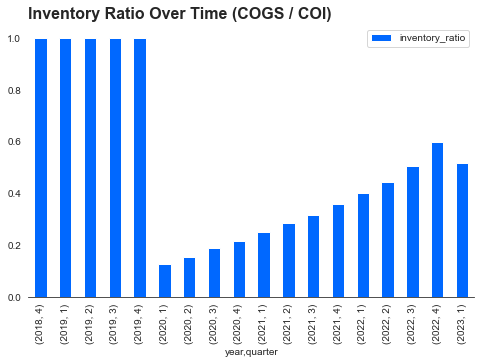

In [89]:
total_inv_df = inv_ratio.groupby(['year', 'quarter'])[['cost_of_goods_sold', 'cost_of_inventory']].sum()
total_inv_df['inventory_ratio'] = total_inv_df.cost_of_goods_sold / total_inv_df.cost_of_inventory

total_inv_df.plot(y='inventory_ratio', kind='bar')
plt.title('Inventory Ratio Over Time (COGS / COI)', loc='left');

# Value Creation
After gaining an understanding of the business, I have identified several tasks to create value for the business.

Data needed:
* `orders`: user_id, created_at, num_of_item
* `users`: id, age, gender, state, city, country, traffic_source, created_at
* `order_items`: order_id, product_id
* `products`: id, cost, category, brand, retail_price, department, distribution_center_id

1. Analyse the Profit Margin and conduct hypothesis tests to help the e-commerce business determine which factors are driving the success of the business. For example, if the results of the hypothesis tests show that there is a significant difference between the Profit Margin of different Traffic Source, the e-commerce business could create targeted marketing campaigns for that the Traffic Source that generates the highest Profit Margin. 

2. Apply KMeans clustering to segment customers into different groups to help the business understand which customer segments are the most profitable and which segments need more attention. This information can then be used to allocate resources more efficiently and improve the overall success of the business.


# Data cleaning, transformation
After scraping the data, I needed to clean it up so that it was usable for our model. 
1. Create copy/views of tables so can clean data

* identfy and remove duplicates
* similar words DIFF()
* consistent formating,data types
* missing values
* consistent field length LENGTH()
* TRIM() unwanted spaces
* spelling errors with REGEX_REPLACE(lower(trim(column_name)), '[^a-zA-Z0-9]+', '')
* date format

I made the following changes:
* Parsed numeric data out of salary
* Made columns for employer provided salary and hourly wages
* Removed rows without salary
* Parsed rating out of company text

Created the following variables:
* Made a new column for company state
* Added a column for if the job was at the company’s headquarters
* Transformed founded date into age of company


create function
cleanse_string (text string)
returns string
as (regex_replace(lower(trim(text)), '[^a-zA-Z0-9]+', '')

# EDA
* SQL analyse data and answer questions, discover insights
* Calculate measures, KPIs -> validate with PowerBI DAX

# Univariate Analysis
I looked at the distributions of the data and the value counts for the various categorical variables. Below are a few highlights from the pivot tables.
* missing values, min, max, mean, median, std, skew, kurtosis
* iqr to detect outliers
* distribution plots
* Prepare data for statistical inference: remove outliers, missing values

# Bivariate Analysis
* statistics summary,
* +/-, effect, test, p-value
* heteroscedascity, skew, kurtosis
* plots


# t-tests

* I tested statistics from the first three quarters, if they´re significant different from the 4th quarter:
* Reject H0 at the 95% confidence interval for Pace, AST, 3P%,'PTS','FT%
* Can´t reject H0 for DEFRTG and OFFRTG at the 95% confidence interval

# KMeans Clustering
I wanted to know the individual team performance, if some teams step up in the 4th quarter:

The actual top 3 in the standings (Bucks, Lakers, Clippers) grouped in the same cluster + the contenders in the west (Thunder, Mavericks)
Also, the bottom teams were all grouped in one cluster
The other two grouped was teams, who are in the middle or don´t improve much in the 4th quarter to be in the elite cluster

# Conclusion
I couldn´t prove, that the defense improved in the last quarter of the game. The lower scoring average in the 4th is a result of less possessions. Still they´re some teams, who play better in the 4th quarter and it is not a coincidence that this are the top ranked teams of the league. Because of that my claim would be, that the best teams have an on-switch and can play their best, when it matters.
* key insights, patterns
* summarise key drivers of KPIs
* plot
* make recommendations to monitor these key drivers


# Dashboard
In this step, I built a flask API endpoint that was hosted on a local webserver by following along with the TDS tutorial in the reference section above. The API endpoint takes in a request with a list of values from a job listing and returns an estimated salary.